<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_sem_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ к семинару 2

Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.
— цена продажи (SalePrice, зависимая переменная),
— наземная жилая зона (GrLivArea),
— общее качество (Overall Quality),
— территория гаража (GarageArea),
— условия сделки (SaleCondition).
Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
df = pd.read_csv('sales.csv', sep=',')

In [19]:
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


In [20]:
df.isna().sum()

,0
SalePrice,0
GrLivArea,0
GarageArea,0
OverallQual,0
Street,0
SaleCondition,0


In [21]:
df[df.duplicated()]

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
831,151000,1200,480,7,Pave,Normal


Удалим один дубликат

In [22]:
df = df.drop(df[df.duplicated()].index)

In [23]:
df[df.duplicated()]

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition


Больше дубликатов нет.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


Пропущенных згачений нет. Два признака Street и SaleCondition имеют строковое, категориальное значение.

Проверим категориальные переменные.

In [24]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [25]:
df.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

Присвоим нумерацию улицам

In [26]:
def Street(row):
    if row['Street'] == 'Pave':
        return 0
    elif row['Street'] == 'Grvl':
        return 1
    else:
        pass

df['Street'] = df.apply(Street, axis = 1)

Присвоим нумерацию условиям сделки

In [27]:
def SaleCondition(row):
    if row['SaleCondition'] == 'Normal':
        return 0
    elif row['SaleCondition'] == 'Abnorml':
        return 1
    elif row['SaleCondition'] == 'Partial':
        return 2
    elif row['SaleCondition'] == 'AdjLand':
        return 3
    elif row['SaleCondition'] == 'Alloca':
        return 4
    elif row['SaleCondition'] == 'Family':
        return 5
    else:
        pass

df['SaleCondition'] = df.apply(SaleCondition, axis = 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SalePrice      1459 non-null   int64
 1   GrLivArea      1459 non-null   int64
 2   GarageArea     1459 non-null   int64
 3   OverallQual    1459 non-null   int64
 4   Street         1459 non-null   int64
 5   SaleCondition  1459 non-null   int64
dtypes: int64(6)
memory usage: 79.8 KB


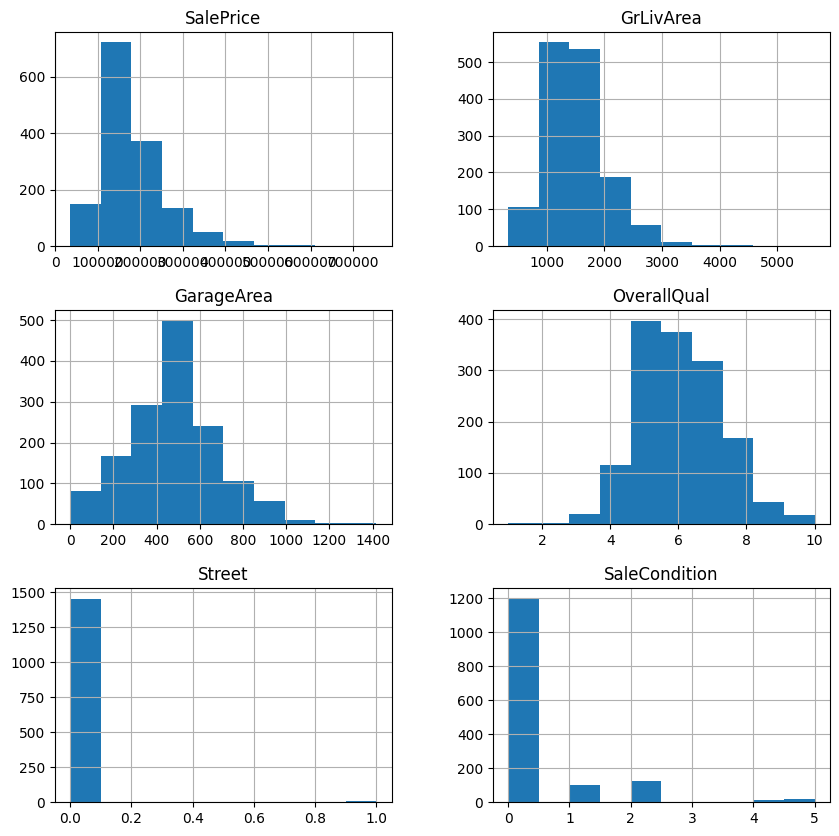

In [29]:
df.hist(figsize=(10, 10));

In [30]:
df.isna().sum()

,0
SalePrice,0
GrLivArea,0
GarageArea,0
OverallQual,0
Street,0
SaleCondition,0


In [32]:
df.describe()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,180941.703907,1515.679918,472.975326,6.098698,0.004112,0.350240
std,79465.875738,525.595586,213.878071,1.383270,0.064018,0.888128
min,34900.000000,334.000000,0.000000,1.000000,0.000000,0.000000
25%,129950.000000,1129.000000,333.000000,5.000000,0.000000,0.000000
50%,163000.000000,1464.000000,480.000000,6.000000,0.000000,0.000000
75%,214000.000000,1777.500000,576.000000,7.000000,0.000000,0.000000
max,755000.000000,5642.000000,1418.000000,10.000000,1.000000,5.000000


Нормализация численных признаков

In [37]:
from sklearn import preprocessing

In [38]:
min_max_Scaler = preprocessing.MinMaxScaler()
col = df.columns
result = min_max_Scaler.fit_transform(df)
df_scaler = pd.DataFrame(result, columns = col)

In [40]:
df_scaler.describe()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.202808,0.222622,0.333551,0.566522,0.004112,0.070048
std,0.110354,0.099020,0.150831,0.153697,0.064018,0.177626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.131996,0.149774,0.234838,0.444444,0.000000,0.000000
50%,0.177892,0.212886,0.338505,0.555556,0.000000,0.000000
75%,0.248715,0.271948,0.406206,0.666667,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


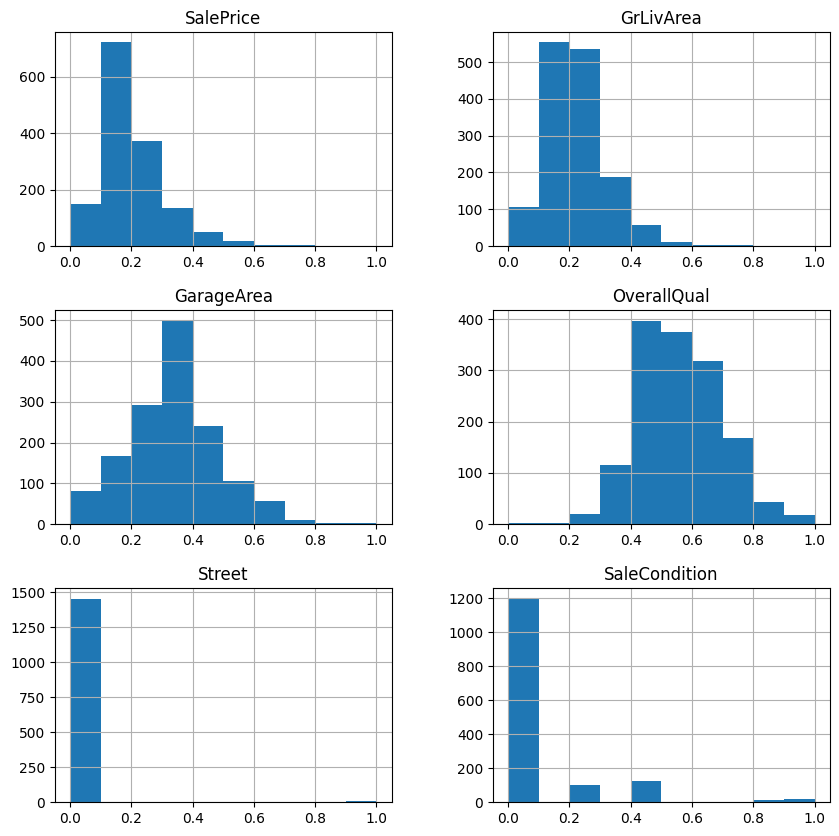

In [41]:
df_scaler.hist(figsize=(10, 10));

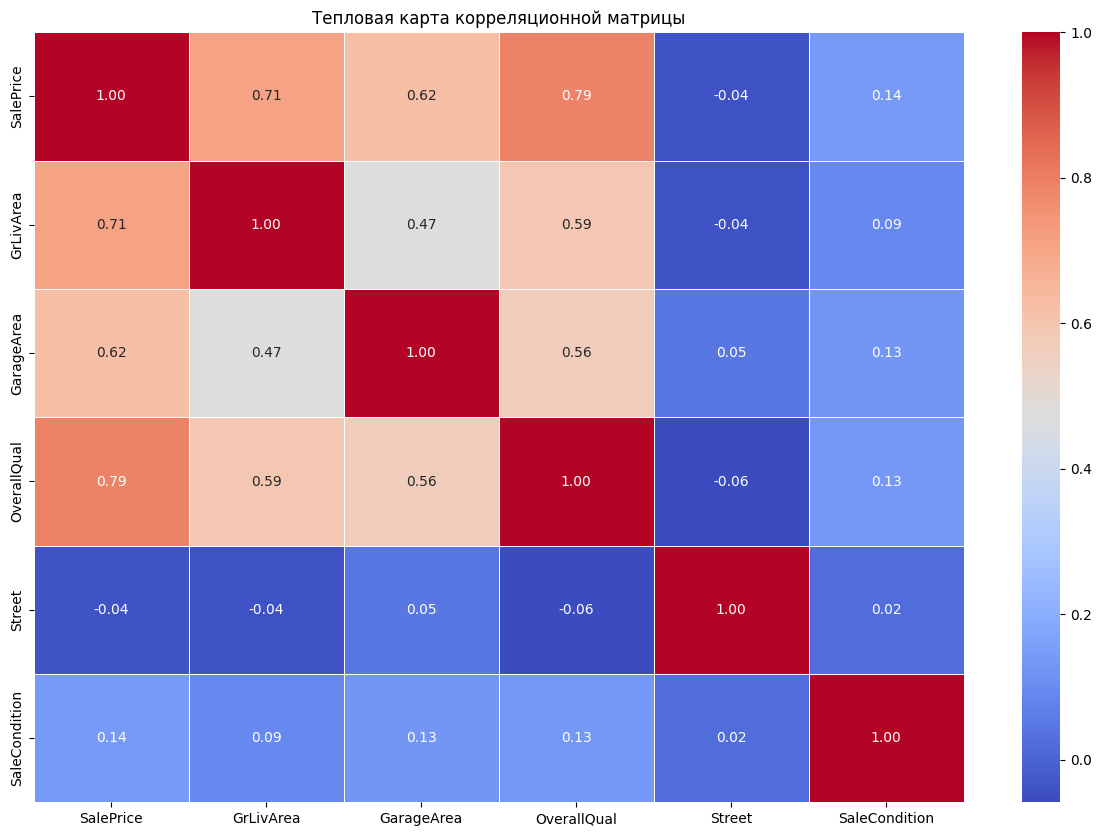

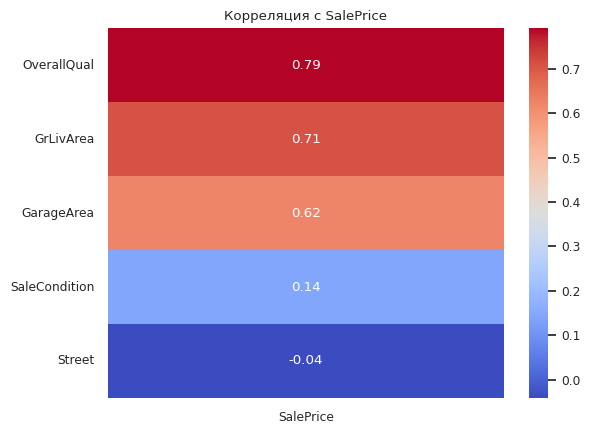

In [43]:
correlation_matrix = df_scaler.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = df_scaler.corr()
target_corr = corr['SalePrice'].drop('SalePrice')

target_corr_sorted = target_corr.sort_values(ascending=False)


sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с SalePrice')
plt.show()

## Создание модели линейной регрессии

Разделение на обучающую и тестовую выборки

In [44]:
X = df_scaler.drop(["SalePrice"], axis=1)
y = df_scaler["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Проверим качество модели на обучающей и тестовой выборках с помощью MAE, MSE и R2.

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(f'Результаты на обучающей выборке:,\
\nMSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

Результаты на обучающей выборке:,
MSE: 0.0034017002622943647,
MAE :0.03781526018221672,
 R2: 0.7235795142986127


In [51]:
y_test_pred = lr.predict(X_test)
print(f'Результаты на тестовой выборке:,\
\nMSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE :{mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

Результаты на тестовой выборке:,
MSE: 0.0022171247437897963,
MAE :0.03554119363099236,
 R2: 0.8090740144713919
